# Lab 7 - Neural Networks

In this exercise we will implement a simple 3-layer neural network from scratch. We won't derive all
the math that's required, but we will try to give you an intuitive explanation of what we are doing and
will point to resources to read up on the details.
The dataset we generated has two classes, plotted as red and blue points. You can think of the blue
dots as male patients (labelled 1) and the red dots as female patients (labelled 0), with the x- and y-axis being medical measurements.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import *

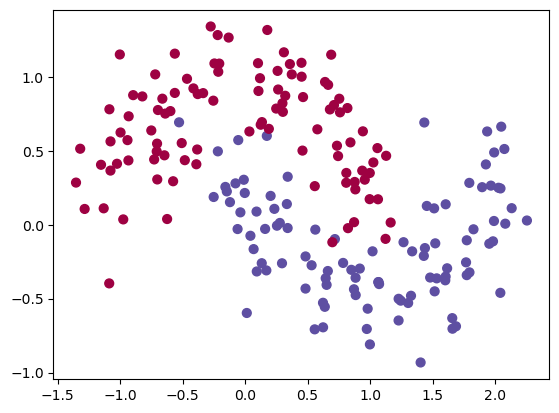

In [7]:
# Generate a dataset and plot it
np.random.seed(0)
X, Y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.Spectral)
plt.show()

In [8]:
# View the first five rows in the dataset together with their label 
print("The input features of the first five rows in the dataset:")
print(X[:5])
print("The labels of the first five rows in the dataset:")
print(Y[:5])

The input features of the first five rows in the dataset:
[[ 0.74346118  0.46465633]
 [ 1.65755662 -0.63203157]
 [-0.15878875  0.25584465]
 [-1.088752   -0.39694315]
 [ 1.768052   -0.25443213]]
The labels of the first five rows in the dataset:
[0 1 1 0 1]


## Why do we need neural networks? 
Our goal is to train classifier that predicts the correct class (male or female) given the x- and y-coordinates. Note that the data is not linearly separable, we can not draw a straight line that separates the two classes. This means that linear classifiers, such as Logistic Regression, won't be able to fit the data unless you hand-engineer non-linear features (such as polynomials) that work well for the given dataset.

In fact, that's one of the major advantages of Neural Networks. You don't need to worry about feature engineering. The hidden layer of a neural network will learn features for you.

## Building a neural network
Let's now build a 3-layer neural network with **one input layer**, **one hidden layer**, and **one output layer**.

### Input Layer
The number of neurons (*or nodes*) in the input layer is determined by the dimensionality of our data (two input
features in our case). The input to the network will be x- and y-coordinates of the previous features. 

### Output Layer
Similarly, the number of nodes in the output layer is determined by the number of classes we have (two classes in our case, but this can be represented by one node (yes/no)). The output is the probability that this point belongs to class 1. Assume Class 1 is label 1 and Class 2 is label 0

### Hidden Layer
We can choose the dimensionality (the number of neurons) of the hidden layer. The more neurons we
stack into the hidden layer, the more complex functions we will be able fit. But higher dimensionality comes at a cost. First, more computation is required to make predictions and learn the network parameters. A bigger number of parameters also means we become more susceptible to **overfitting our data**.

Here is an example of a MLP (multi-layer perceptron) or equivalently a neural network with **one input layer, two hidden layers and an output layer.**

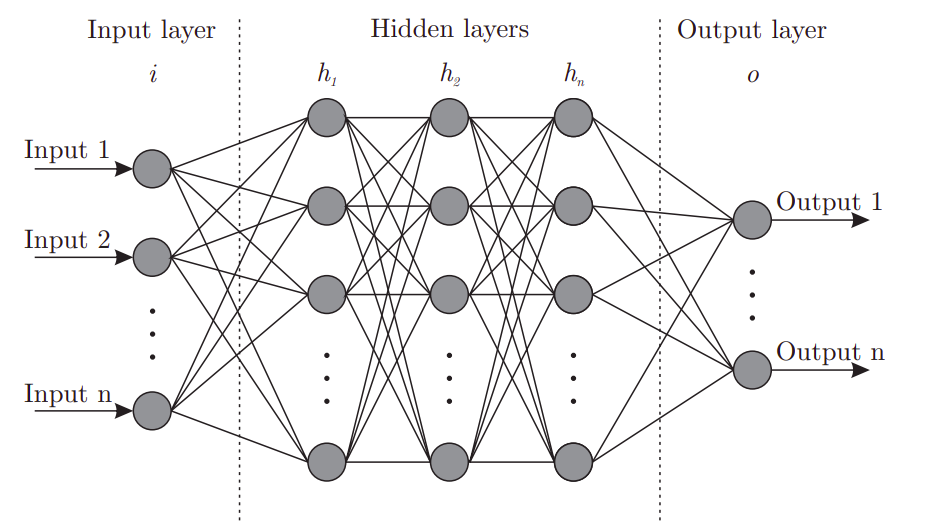

## How to choose the size of the hidden layer?

While there are some general guidelines and recommendations, it always depends on your specific problem and is more of an art than a science. We will play with the number of nodes in the hidden layer later on and see how it affects our output.

## How to choose the activation functions for hidden layers and output layer?

We also need to pick an activation function for our hidden layer. The activation function transforms the inputs of the layer into its outputs. A nonlinear activation function is what allows us to fit **nonlinear** hypotheses. 

Common choices for activation functions are:
1. tanh (Tangent Hyperbolic Function). 
2. Sigmoid function.
3. ReLU (Rectified Linear Unit). 
4. Leaky ReLU (Leaky Rectified Linear Unit). 

In our example, we will use tanh as an activation function for the hidden layer, which performs quite well in many scenarios. In the output layer, we will use sigmoid due its binary outcome (a number between 0 and 1) unlike tanh.

*A nice property of these functions is that their derivative can be computed using the original function value. (How is that?)*

This is useful because it allows us to compute the activation function once and re-use its value later on to get the derivative

## How does our network make predictions?
The training of a neural network is divided into four steps:
1. **Forward Propagation**
2. **Computing the cost function**
3. **Backward Propagation**
4. **Weight Update** 

## Forward Propagation 
We denote $x$ as $a_0$ since it is the input layer (or the activations of the input layer/zeroth layer).

\begin{align}
z_1 & = W_1 a_0 + b_1 \\
a_1 & = tanh(z_1) \\
z_2 & = W_2 a_1 + b_2 \\
a_2 & = \hat{y} = sigmoid(z_2)\\
\end{align}

$z_k$ is the weighted sum of inputs of layer $k$ (bias included) and $a_k$ is the output of layer $k$ after applying the activation function. 

$W_1$, $W_2$, $b_1$, and $b_2$ are the parameters of our network, which we need to learn from our training data.
Note that $W_1$ is a matrix of dimension (# of hidden layer units, # of input layer units), $W_2$ is a matrix
of dimension (# of output layer units, # of hidden layer units).

## Backpropagation and learning the parameters.

Remember that our goal is to find the **parameters** that minimize our **loss function**. The loss function
is equal to

\begin{equation}
\mathcal{L} = -\big(y log \hat{y} + (1-y) log (1-\hat{y})\big)
\end{equation}

This function is called **cross entropy loss function**. We can use **gradient descent** to find its minimum.

As an input, gradient descent needs the gradients (vector of derivatives) of the loss function with
respect to our parameters: $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_1}}$, and $\frac{\partial{L}}{\partial{b_2}}$.

To calculate these gradients we use the **backpropagation algorithm**, which is a way to efficiently
calculate the gradients starting from the output.

It is required to derive the four partial derivatives  $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_1}}$, and $\frac{\partial{L}}{\partial{b_2}}$ given that you know the loss function $\mathcal{L}$.

We need to compute the derivative of the loss function with respect to $W_1$, $W_2$, $b_1$, and $b_2$.
### Note: 
In the code, we will call any derivative of the loss function with respect to some other variable as
*dOtherVariable*.
For example,  $\frac{\partial{L}}{\partial{W_1}}$ is named in the code as `dW1`, where $\frac{\partial{L}}{\partial{b_1}}$ is named in the code as `db1`, and so on.

In [19]:
m = len(X)  # training set size
nn_input_dim = 2  # input layer dimensionality (we have two input features)
nn_output_dim = 1  # output layer dimensionality (we have one output)

# Gradient descent parameters
alpha = 0.1  # learning rate for gradient descent
print(m)

200


In [20]:
def sigmoid(x):
    # TODO 1: Compute the sigmoid function at the given x (~1 line)
    # For example: sigmoid(2) should compute the value of sigmoid function at x = 2.
    # Hint: Use np.exp instead of math.exp to allow for vectorization.
    #----------------------------------------------------------------------------------------------
    sig = 1/(1+ np.exp(-x))
    #----------------------------------------------------------------------------------------------
    
    return sig

In [48]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # This function learns parameters for the neural network and returns the model.
    # - nn_hdim: Number of nodes in the hidden layer
    # - num_passes: Number of iterations (epochs) through the training data for gradient descent
    # - print_loss: If True, print the loss every 1000 iterations

    # Initialize the parameters to random values. We need to learn these at the end.
    np.random.seed(0)
    W1 = np.random.randn(nn_hdim, nn_input_dim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((nn_hdim, 1))
    W2 = np.random.randn(nn_output_dim, nn_hdim) / np.sqrt(nn_hdim)
    b2 = np.zeros((nn_output_dim, 1))

    # This is what we return at the end
    model = {}

    # Batch Gradient descent (We accumulate the loss for each training point before updating the weights)
    # For each iteration:
    for i in range(0, num_passes):
        DW1 = 0
        DW2 = 0
        Db1 = 0
        Db2 = 0
        cost = 0
        # Loop on every training example...
        for j in range(0, m):
            a0 = X[j, :].reshape(-1, 1)  # Every training example is a column vector.
            y = Y[j]
            
            # TODO 2: Apply forward propagation on every training example a0 (a column vector 2x1) with its
            # corresponding label y. It is required to compute z1, a1, z2, and a2
            #----------------------------------------------------------------------------------------------
            # Forward propagation
            z1 = W1@a0 + b1
            a1 = np.tanh(z1)
            z2 = W2@a1 + b2
            a2 = sigmoid(z2)
            
            #----------------------------------------------------------------------------------------------

            # TODO 3: Compute the cost/loss function for every training example (Hint: use np.log)
            # ---------------------------------------------------------------------------------------------
            cost_j = -(y*np.log(a2)+(1-y)*np.log(1-a2))
            # ---------------------------------------------------------------------------------------------

            # TODO 4: Derive the equations of backpropagation to find dW2, db2, dW1, and db1.
            # Hint: Check the dimensions at each step. 
            # Hint: For element-wise multiplication use *, for matrix multiplication use @
            # Example: y = A * B performs element wise multiplication 
            #          y = A @ B performs matrix multiplication
            # ---------------------------------------------------------------------------------------------
            da2 = -((y/a2)-((1-y)/(1-a2)))
            dz2 = da2 * (sigmoid(z2) *(1-sigmoid(z2)))
            dW2 = dz2 @ a1.T
            db2 = dz2

            da1 = W2.T @ dz2 
            dz1 = da1 * np.power(np.cosh(z1),-2)
            dW1 = dz1 @ a0.T
            db1 = dz1
            # ---------------------------------------------------------------------------------------------
            
            # Accumulating the sum of dW1, db1, dW2, db2 and cost_j into the variables DW1, Db1, DW2, Db2 and cost
            # for all training set. 
            DW1 += dW1
            DW2 += dW2
            Db2 += db2
            Db1 += db1
            cost += cost_j
        
        # Averaging DW1, DW2, Db1, Db2 and cost over the m training examples. 
        DW1 /= m
        DW2 /= m
        Db1 /= m
        Db2 /= m
        cost /= m

        # TODO 5: Perform the gradient descent parameter update.
        # ---------------------------------------------------------------------------------------------------
        # Gradient descent parameter update
        W1 += DW1 * -alpha 
        b1 += Db1 * -alpha
        W2 += DW2 * -alpha
        b2 += Db2 * -alpha
        # ---------------------------------------------------------------------------------------------------

        # Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" % (i, cost))

    return model


In [49]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    a0 = x.T
    
    # TODO 6 (aka TODO 2): Apply forward propagation on every test example a0 (a column vector 2x1) with its
    #  corresponding label y. It is required to compute z1, a1, z2, and a2  (SAME AS TODO2).
    # -----------------------------------------------------------------------------------------------
    z1 = W1.dot(a0)+ b1
    a1 = np.tanh(z1)
    z2 = W2.dot(a1) + b2
    a2 = sigmoid(z2)
    # ------------------------------------------------------------------------------------------------
    # Applying a threshold of 0.5 (i.e. predictions greater than 0.5 are mapped to 1, and 0 otherwise)
    prediction = np.round(a2)
    
    return prediction

In [50]:
# Build a model with a 3-dimensional hidden layer.
model = build_model(nn_hdim=4, num_passes=10000, print_loss=True)

Loss after iteration 0: 0.622146
Loss after iteration 1000: 0.270443
Loss after iteration 2000: 0.172398
Loss after iteration 3000: 0.115917
Loss after iteration 4000: 0.094291
Loss after iteration 5000: 0.083825
Loss after iteration 6000: 0.078296
Loss after iteration 7000: 0.075147
Loss after iteration 8000: 0.073040
Loss after iteration 9000: 0.071358


If you are working correctly. You should observe values close to (We displayed here only the first 5 values).

`
Loss after iteration 0: 0.622146
Loss after iteration 1000: 0.270443
Loss after iteration 2000: 0.172398
Loss after iteration 3000: 0.115917
Loss after iteration 4000: 0.094291`

If the first two values are not similar as shown above, you may want to stop running the cell and check what's wrong has happened in your code.

### Note (1): 
The training of the neural network takes a long time as you can observe due lots of computations. The vectorization of the above code will be extremely useful in accelerating the training and converging faster. 

### Note (2):
After a number of iterations, you will observe that the network is already converging with the loss already reaching a steady value. You can increase the number of iterations if you want to train the network longer. 


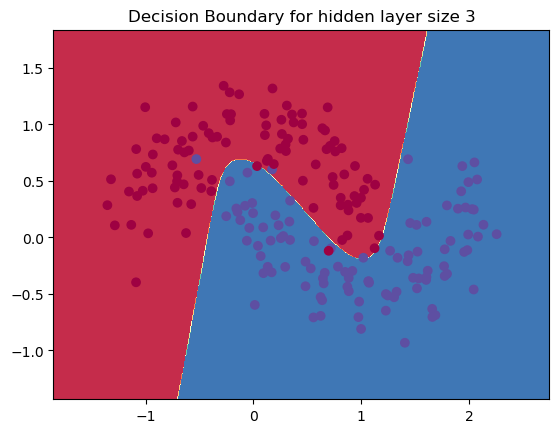

In [51]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)



# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()

## Todo 7:

Try changing the number of hidden layer neurons. What do you conclude?



In [ ]:
# Your answer should go here. 
# continue increasing => overfitting, complex neural network for the given dataset
# continue decreasing => underfitting, simple neural network for the given dataset  

## Todo 8:

Try changing the value of the learning rate. What do you conclude? (Use $\alpha$ = 0.01, 0.001, 0.5 for example)


In [52]:
# Your answer should go here. 
# for alpha = 0.01 =>  converge slower
# for alpha = 0.001 => convery much slower 
# for alpha = 0.5 => converge faster, and will not oscilliate, so its more appropriate than 0.1 

## Todo 9:

Without re-writing any code or modifying anything, 
If we change the activation function in the hidden layer to be sigmoid function instead of tanh. What exwill need to be modified in your code?

In [53]:
# Your answer should go here. 
# the calculations of all derivatives, especially z2 and a1